# Q4: Conduct a customer churn prediction for an e-commerce company.

* Student ID: p233340 
* Name: Kwok Tsz Yi
* Course: COM6101

In [222]:
# import libraries and dataset
import pandas as pd
import graphviz
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

df = pd.read_excel('Q4.xlsx', sheet_name=0) # specify the sheet as the first sheet in the file
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


### Handling Missing Values

In [223]:
df.shape

(5630, 20)

In [224]:
# check missing values
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [225]:
# drop missing values
df = df.dropna()
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

## Exploratory Data Analysis

As column 'customerID' is unique for each customer, it is not useful for prediction. Therefore, this column will be dropped.

In [226]:
df = df.drop(['CustomerID'], axis = 1)

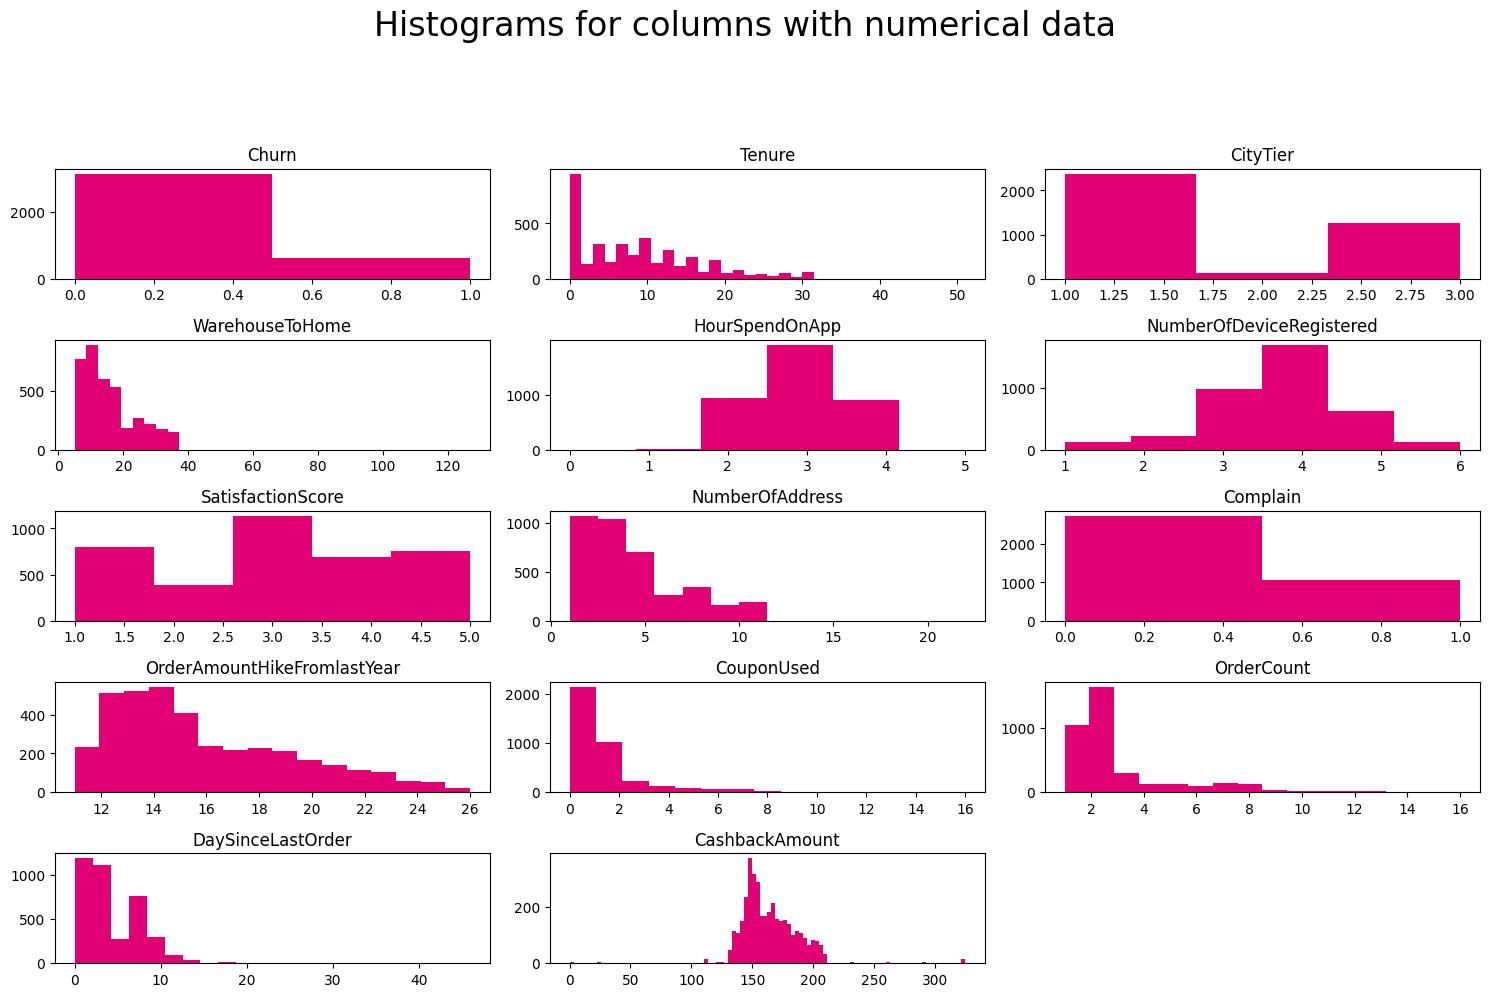

In [227]:
# HISTOGRAMS FOR COLUMNS WITH NUMERICAL DATA
import numpy as np

ds_histograms = df.select_dtypes(include=['float64', 'int64'])

fig1 = plt.figure(1, figsize=(15, 12))
plt.suptitle('Histograms for columns with numerical data\n', \
                 horizontalalignment="center",fontstyle = "normal", \
                 fontsize = 24, fontfamily = "sans-serif")

for i in range(ds_histograms.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(ds_histograms.columns.values[i])
    vals = np.size(ds_histograms.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    plt.hist(ds_histograms.iloc[:, i], bins=vals, color = '#e20075')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

As per the plot of histrogram, we can see that the column 'Churn' is a binary column, as it only contains two values: '0' or '1'. In columns 'OrderCount', 'DaySinceLastOrder', 'CouponUsed', 'CashbackAmount', 'Tenure' and 'WarehouseToHome', data distribution of these columns are more dispersed.

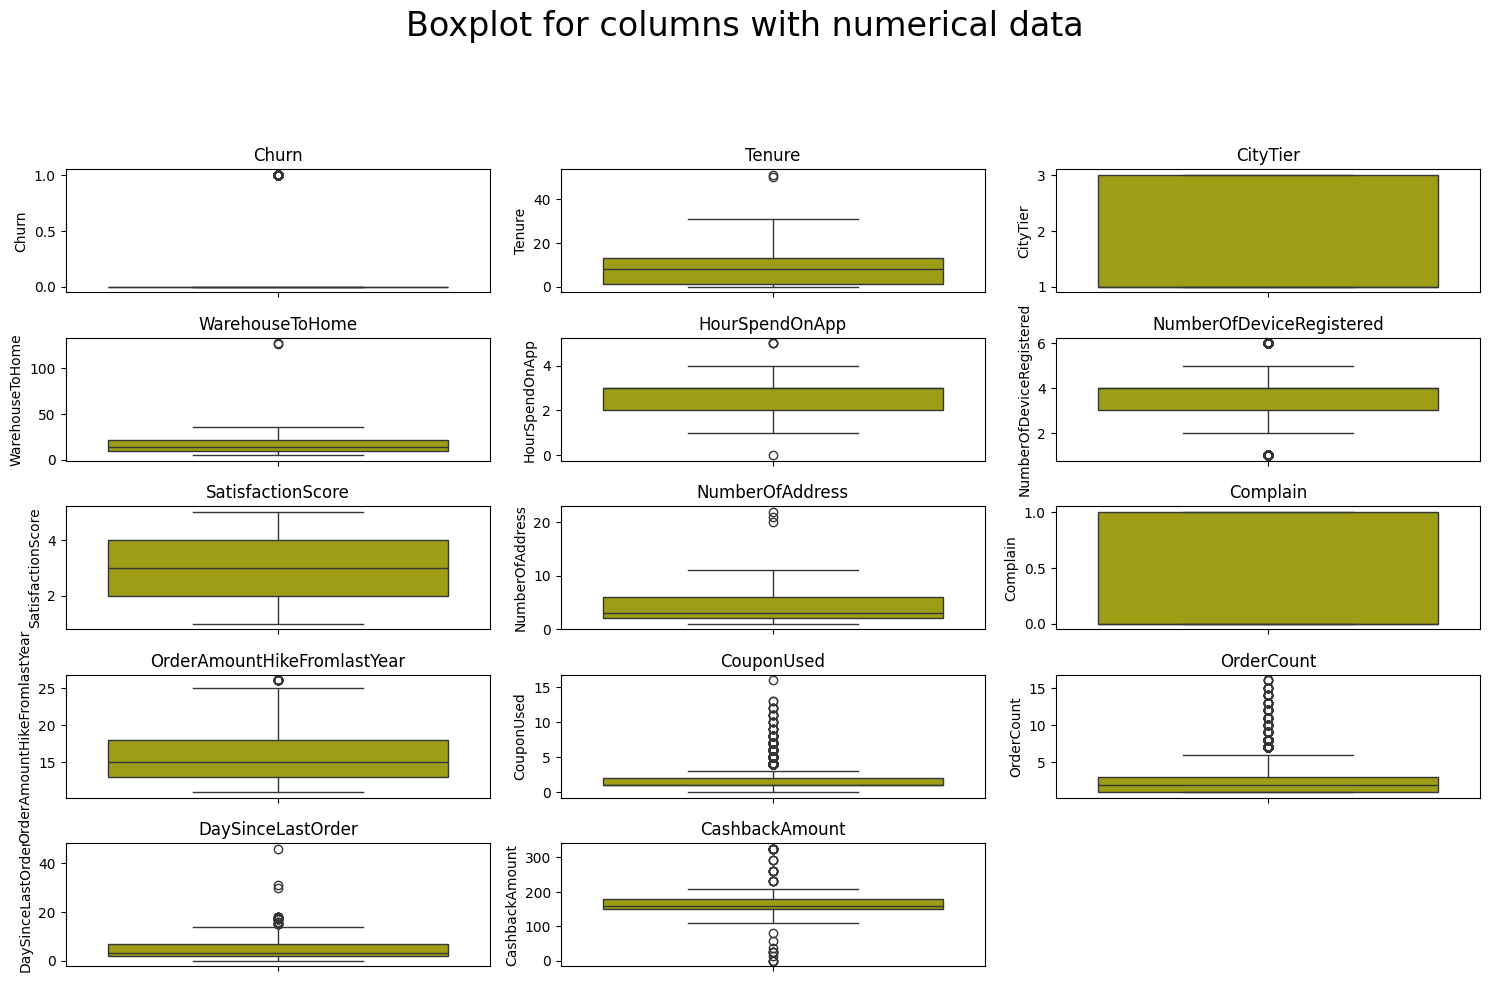

In [228]:
# BOXPLOT FOR COLUMNS WITH NUMERICAL DATA
fig2 = plt.figure(1, figsize=(15, 12))
plt.suptitle('Boxplot for columns with numerical data\n', \
                 horizontalalignment="center",fontstyle = "normal", \
                 fontsize = 24, fontfamily = "sans-serif")

for i in range(ds_histograms.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(ds_histograms.columns.values[i])
    sns.boxplot(ds_histograms.iloc[:, i], orient="v", color = '#b3b300')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The analytical results from boxplot is in line with the histrogram.

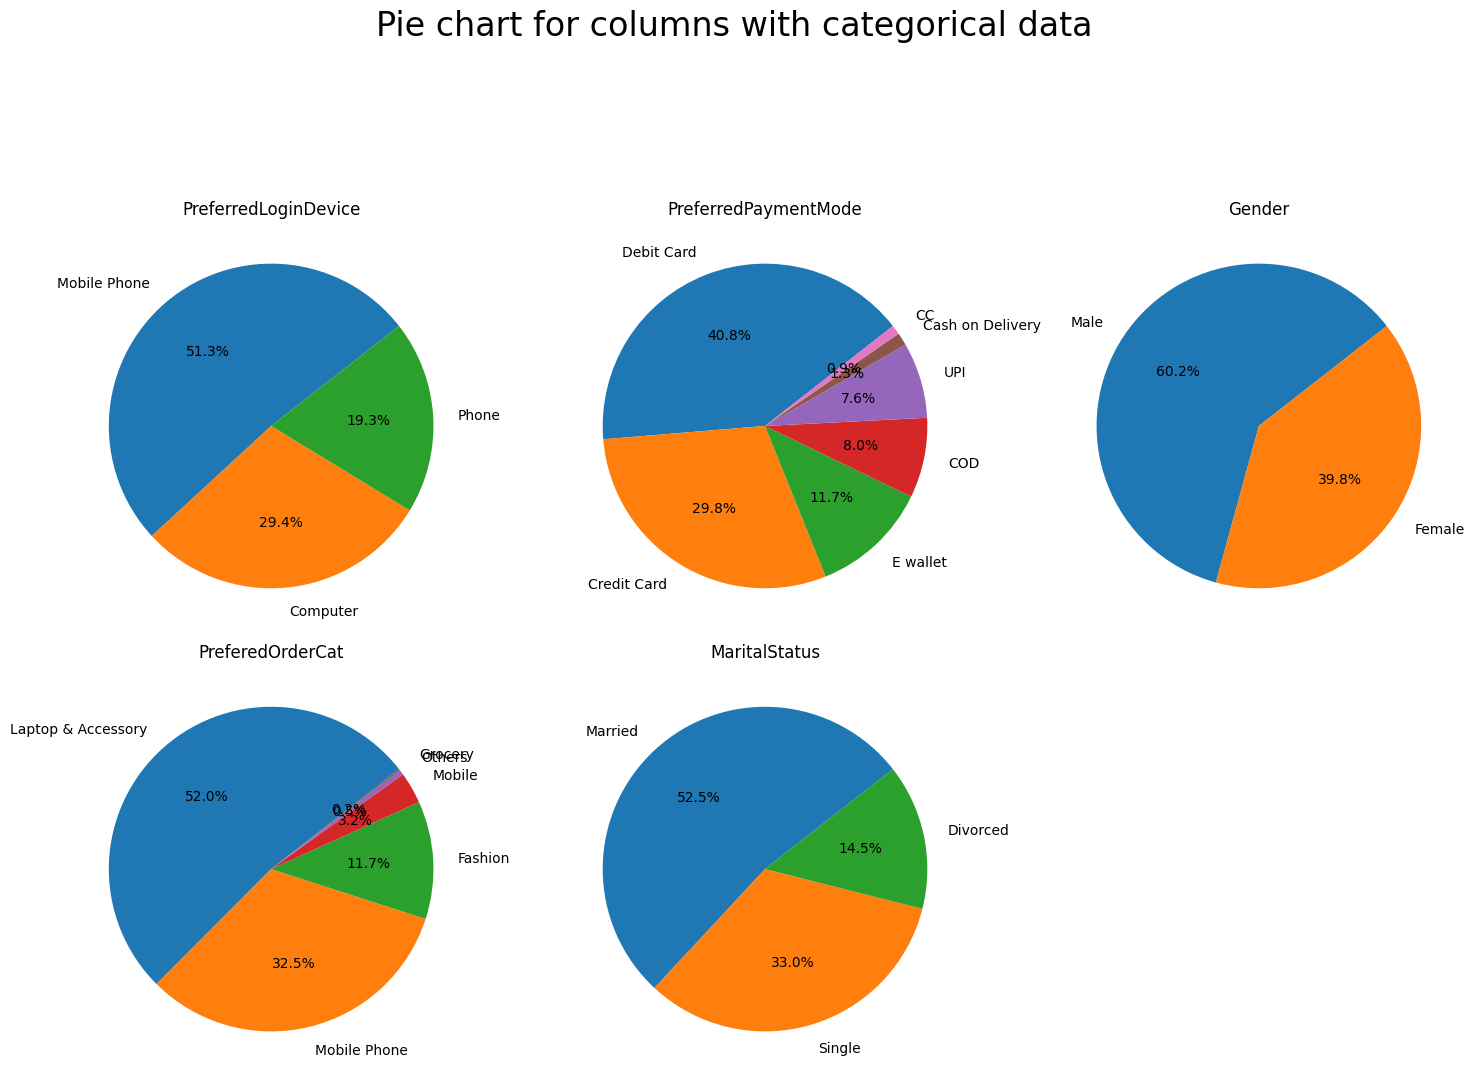

In [229]:
# pie chart for categorical data
ds_pie = df.select_dtypes(include=['object'])

fig3 = plt.figure(1, figsize=(15, 30))
plt.suptitle('Pie chart for columns with categorical data\n', \
                 horizontalalignment="center",fontstyle = "normal", \
                 fontsize = 24, fontfamily = "sans-serif")

for i in range(ds_pie.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(ds_pie.columns.values[i])
    values = df[ds_pie.columns.values[i]].value_counts()
    index = values.index
    # adjust the lettering on the pie chart to be more readable
    plt.pie(values, labels = index, autopct='%1.1f%%', labeldistance=1.15, startangle = 38, textprops={'fontsize': 10})
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

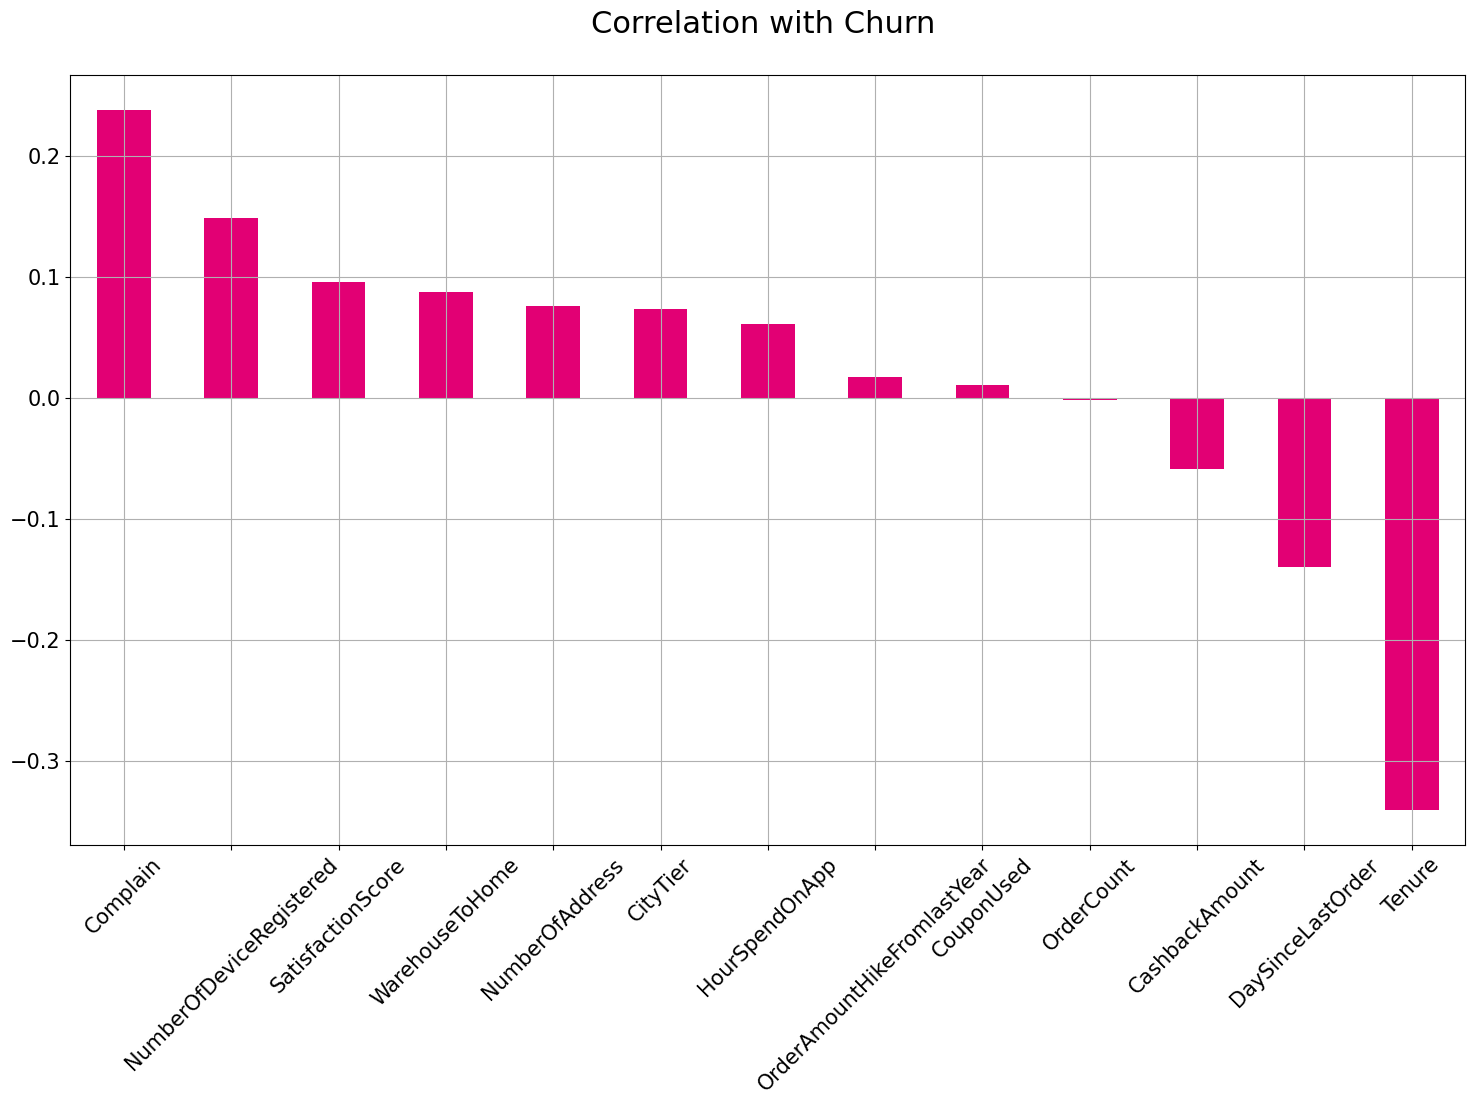

In [230]:
# correlation of numerical columns with churn
# Correlation between churn and selected boolean and numeric variables
plt.figure(6)

correlations = df.select_dtypes(include = ['float64', 'int64', 'int32']).corr()['Churn'].sort_values(ascending = False)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = '#e20074',
        rot = 45, grid = True)

plt.title('Correlation with Churn \n', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.show()

## Data Preprocessing

### Transforming Categorical Variables

In [231]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
5,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
11,1,11.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Fashion,3,Single,10,1,13.0,0.0,1.0,0.0,153.81
12,1,0.0,Phone,1,11.0,COD,Male,2.0,3,Mobile,3,Single,2,1,13.0,2.0,2.0,2.0,134.41


In [232]:
# one hot encoding for categorical data
df = pd.get_dummies(df, drop_first=True)

# turn dtype of bool to int
for col in df.select_dtypes(include=['bool']).columns:
    df[col] = df[col].astype(int)

df.dtypes

Churn                                      int64
Tenure                                   float64
CityTier                                   int64
WarehouseToHome                          float64
HourSpendOnApp                           float64
NumberOfDeviceRegistered                   int64
SatisfactionScore                          int64
NumberOfAddress                            int64
Complain                                   int64
OrderAmountHikeFromlastYear              float64
CouponUsed                               float64
OrderCount                               float64
DaySinceLastOrder                        float64
CashbackAmount                           float64
PreferredLoginDevice_Mobile Phone          int32
PreferredLoginDevice_Phone                 int32
PreferredPaymentMode_COD                   int32
PreferredPaymentMode_Cash on Delivery      int32
PreferredPaymentMode_Credit Card           int32
PreferredPaymentMode_Debit Card            int32
PreferredPaymentMode

In [233]:
# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
# Calculating Variable Inflation Factors
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["Variable Inflation Factors"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

vif = calculate_vif(df.select_dtypes(include=['float64', 'int64', 'int32']))
vif

,variables,Variable Inflation Factors
0,Churn,1.678892
1,Tenure,3.026913
2,CityTier,6.357134
3,WarehouseToHome,4.433361
4,HourSpendOnApp,24.910880
5,NumberOfDeviceRegistered,17.211286
6,SatisfactionScore,5.961189
7,NumberOfAddress,4.320801
8,Complain,1.509639
9,OrderAmountHikeFromlastYear,19.679743


In [234]:
# select columns with vif less than 10
columns = list(vif[vif['Variable Inflation Factors'] < 10]['variables'])
df = df[columns]

In [235]:
# remaining columns vif
calculate_vif(df.select_dtypes(include=['float64', 'int64', 'int32']))

,variables,Variable Inflation Factors
0,Churn,1.655787
1,Tenure,2.862722
2,CityTier,4.244400
3,WarehouseToHome,4.133095
4,SatisfactionScore,5.268192
5,NumberOfAddress,4.019904
6,Complain,1.480934
7,CouponUsed,4.532530
8,OrderCount,5.866158
9,DaySinceLastOrder,3.704478


## Decision Tree analyze for finding the important features for predicting customer churn

In [236]:
# split data into train and test
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

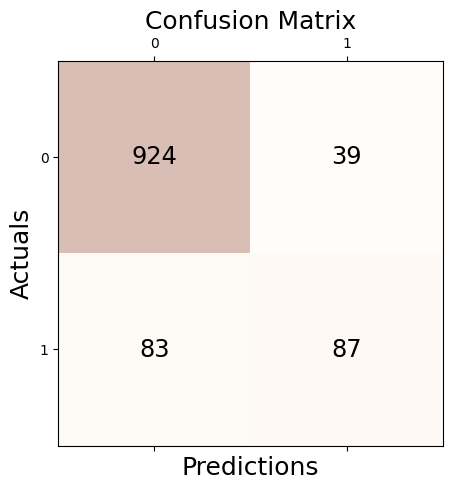

In [237]:
# decision tree to predict churn: class 0 means no churn, class 1 means churn
dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train,y_train)

dtree_predict = dtree.predict(X_test)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=dtree_predict)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [238]:
print('Precision: %.3f' % precision_score(y_test, dtree_predict))
print('Recall: %.3f' % recall_score(y_test, dtree_predict))
print('Accuracy: %.3f' % accuracy_score(y_test, dtree_predict))
print('F1 Score: %.3f' % f1_score(y_test, dtree_predict))

Precision: 0.690
Recall: 0.512
Accuracy: 0.892
F1 Score: 0.588


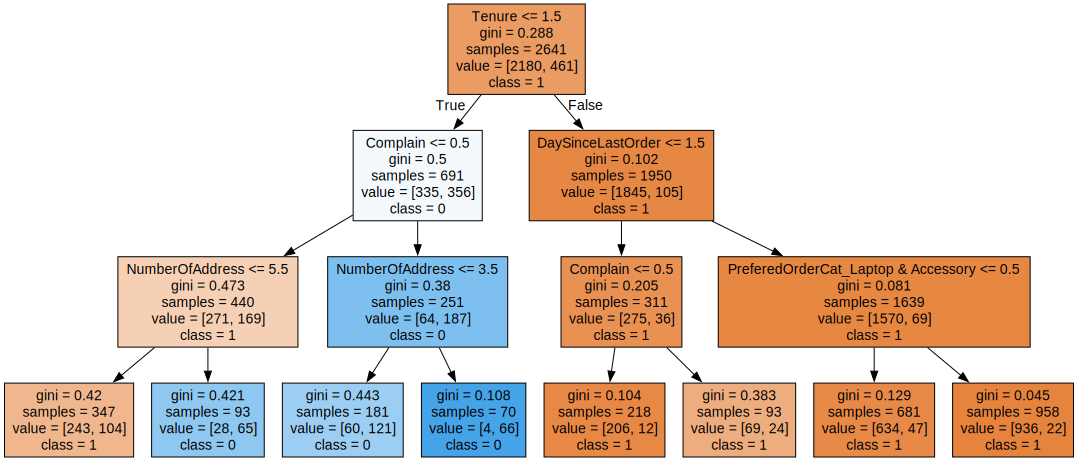

In [239]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/' # specify the path to the graphviz bin folder, otherwise it will not work

y_str_label = np.array(y.unique()).astype(str)
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y_str_label,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

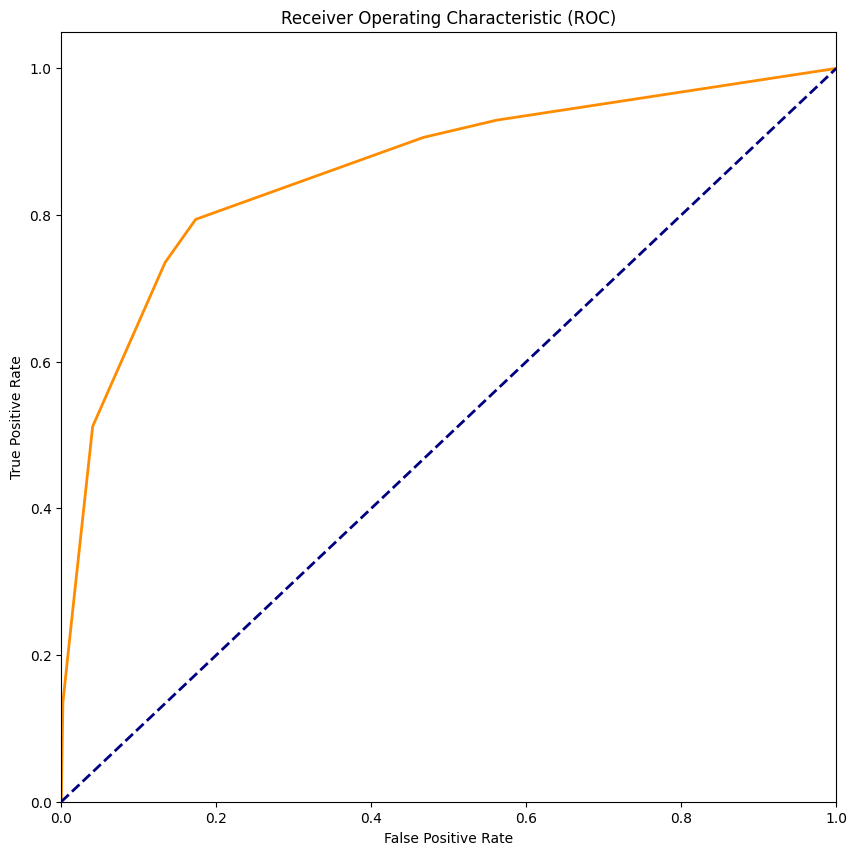

In [240]:
# draw an auc curve for the decision tree
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_score = dtree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.show()